<a href="https://colab.research.google.com/github/tentenvi/IIS/blob/main/%D0%98%D0%98%D0%A16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вариант 13

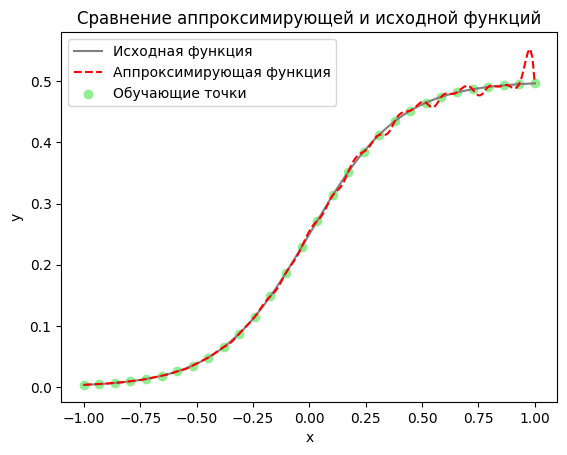

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем целевую функцию
def target_function(x):
    return 0.5 / (1 + np.exp(-5 * x))

# Интервал для построения функции
x_interval = [-1, 1]

# Формирование обучающей выборки
x_train = np.linspace(x_interval[0], x_interval[1], 30)  # 30 точек на интервале [-1, 1]
y_train = target_function(x_train)  # Вычисляем значения функции в точках x_train

# Задаем параметры RBF нейронной сети
n_neurons = 50  # Количество нейронов в скрытом слое
centers = np.linspace(x_interval[0], x_interval[1], n_neurons)  # Центры для RBF
sigma = (centers[1] - centers[0]) / np.sqrt(2)  # Ширина гауссовых функций

# Формируем матрицу Phi для обучающей выборки
Phi = np.exp(-((x_train[:, None] - centers) ** 2) / (2 * sigma ** 2))

# Вычисление весов W с помощью псевдообратной матрицы
W = np.linalg.pinv(Phi) @ y_train  # Псевдообратная матрица для расчета весов

# Аппроксимация функции на новых данных
x_test = np.linspace(x_interval[0], x_interval[1], 200)  # Тестовые точки
Phi_test = np.exp(-((x_test[:, None] - centers) ** 2) / (2 * sigma ** 2))  # Phi для тестовых данных
y_pred = Phi_test @ W  # Значения аппроксимирующей функции

# Визуализация результатов
plt.plot(x_test, target_function(x_test), label="Исходная функция", color="grey")
plt.plot(x_test, y_pred, label="Аппроксимирующая функция", color="red", linestyle="--")
plt.scatter(x_train, y_train, color="lightgreen", label="Обучающие точки")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение аппроксимирующей и исходной функций")
plt.show()
